**Import some necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dumbbell Chart

This practice comes from the challenge [**#WOW2022 Week 32: Can you build a dumbbell chart?**](https://workout-wednesday.com/2022w32tab/). The original challege used *Tableau* as the visualization tool. In this practice, I try to re-produce the same chart with *Matplotlib*. Without further ado, let's do it!

First, load the data from `datasets/Teen-Tween_Smartphone_Ownership.xlsx`.

In [2]:
data_file = 'datasets/Teen-Tween_Smartphone_Ownership.xlsx'
phone_ownership = pd.read_excel(data_file)
phone_ownership.head()

,Year,Age,Ownership
0,2015,8,0.11
1,2015,9,0.15
2,2015,10,0.19
3,2015,11,0.32
4,2015,12,0.41


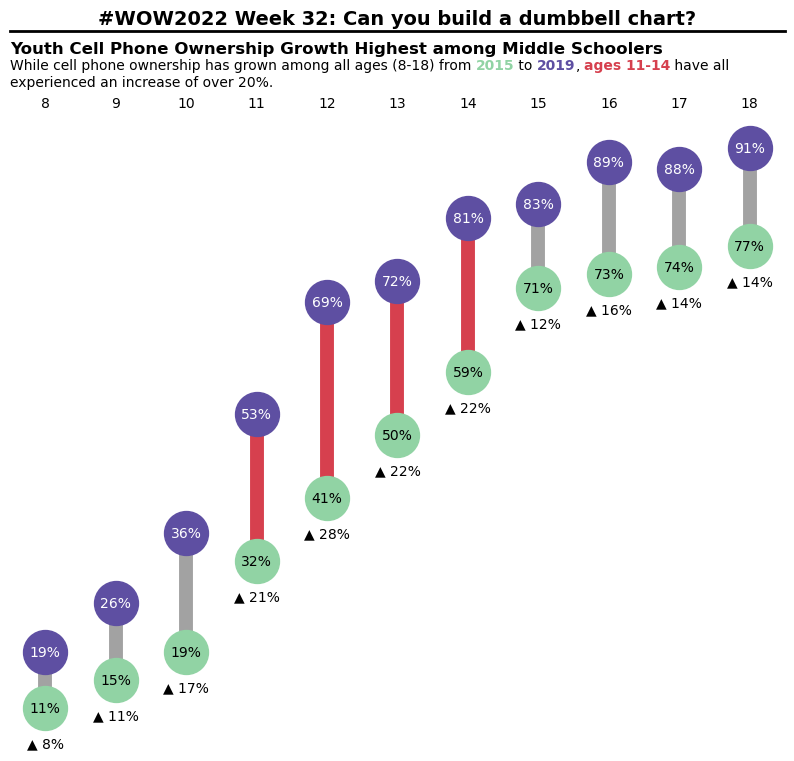

In [3]:
import matplotlib.collections as mcol
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.offsetbox as moffsetbox

px = 1 / plt.rcParams['figure.dpi']

fig, ax = plt.subplots(figsize=(1000*px, 800*px))

color_for_years = ['#91D3A4', '#5E4FA2']
color_for_labels = ['black', 'white']
years = [2015, 2019]
ball_size = 1000
dots = []
for year, year_color, label_color in zip(years, color_for_years, color_for_labels):
    ownership_selected = phone_ownership[phone_ownership['Year'] == year]
    ax.scatter(ownership_selected['Age'], ownership_selected['Ownership'],
               c=year_color, s=ball_size)
    for _, age, pct in ownership_selected.itertuples(index=False):
        ax.text(age, pct, f'{pct*100:.0f}%', ha='center', va='center',
                c=label_color)

    dots.append(ownership_selected.loc[:, ['Age', 'Ownership']].values)

bar_colors = ['#a2a2a2'] * 3 + ['#d6404e'] * 4 + ['#a2a2a2'] * 4
joint_bars = mcol.LineCollection(zip(*dots), lw=10, zorder=0, 
                                 edgecolors=bar_colors)
ax.add_collection(joint_bars)

ax.spines[:].set_visible(False)
ax.tick_params(bottom=False, left=False, 
               labelbottom=False, labelleft=False, labeltop=True)
ax.set_xticks(dots[1][:,0])

# Hightlight part text
des1 = moffsetbox.TextArea("While cell phone ownership has grown among all ages (8-18) from ")
des2015 = moffsetbox.TextArea("2015", textprops=dict(color=color_for_years[0],
                                                     fontweight='bold'))
des2 = moffsetbox.TextArea(" to ")
des2019 = moffsetbox.TextArea("2019", textprops=dict(color=color_for_years[1],
                                                     fontweight='bold'))
des3 = moffsetbox.TextArea(", ")
des11_14 = moffsetbox.TextArea("ages 11-14", textprops=dict(color="#d6404e",
                                                            fontweight='bold'))
des4 = moffsetbox.TextArea(" have all")
des5 = moffsetbox.TextArea("experienced an increase of over 20%.")
line1 = moffsetbox.HPacker(children=[des1, des2015, des2, des2019, des3, des11_14, des4],
                           pad=0, sep=0, align='bottom')
description = moffsetbox.VPacker(children=[line1, des5], 
                                 pad=0, sep=2, align='left')

pad = (ax.xaxis.get_tick_padding() +    # Tick length in points
       ax.xaxis.get_major_ticks()[0].get_pad() +    # Distance in points between the ticklabel and the tick
       1.5 * ax.xaxis.get_majorticklabels()[0].get_fontsize() # Font size of tick labels
)

desp_txt = moffsetbox.AnnotationBbox(description, xy=(0, 1), xybox=(0, pad),
                                     xycoords='axes fraction', boxcoords='offset points',
                                     box_alignment=(0, 0), pad=0, frameon=False)
ax.add_artist(desp_txt)

des_title = "Youth Cell Phone Ownership Growth Highest among Middle Schoolers"
des_title_pad = pad + desp_txt.get_fontsize() * 1.2 * 2
des_title_txt = ax.annotate(des_title, xy=(0, 1), xytext=(0, des_title_pad), 
                          xycoords="axes fraction", textcoords="offset points",
                          ha='left', va='bottom', fontsize=12, fontweight='bold')

title_pad = des_title_pad + des_title_txt.get_fontsize() * 1.5
sepline_trans = ax.transAxes + mtransforms.ScaledTranslation(0, title_pad/72, fig.dpi_scale_trans)
sep_line = mlines.Line2D((0, 1), (1, 1), lw=2, c='k', clip_on=False, transform=sepline_trans)
ax.add_artist(sep_line)

fig_title = "#WOW2022 Week 32: Can you build a dumbbell chart?"
ax.annotate(fig_title, xy=(0.5, 1), xytext=(0, title_pad + 2),
            xycoords="axes fraction", textcoords="offset points",
            ha='center', va='bottom', fontsize=14, fontweight='bold')

for data2015, data2019 in zip(*dots):
    diff = data2019[1] - data2015[1]
    ax.annotate(f"▲ {diff*100:.0f}%", xy=data2015, xytext=(0, -np.sqrt(ball_size)/2-5), 
                textcoords="offset points", ha='center', va='top')

plt.show()